In [2]:
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import numpy as np
from datetime import timedelta

# Summarizing Transacion Data

Import Files & Read files

In [3]:
file_path = "C:/Users/TARUN/OneDrive/Desktop/My DSA/internship/Quantium/"

transaction_data = pd.read_excel(file_path + "QVI_transaction_data.xlsx")



In [4]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1970-01-01,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1970-01-01,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1970-01-01,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transaction_data.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,1970-01-01,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,1970-01-01,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,1970-01-01,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,1970-01-01,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,1970-01-01,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


Sanity Check of data

In [6]:
# Size Of Data

transaction_data.shape

(264836, 8)

In [7]:
# Transaction Data Info

transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
# Checking Null Values

transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [9]:
# Finding Duplicates Values

transaction_data.duplicated().sum()

np.int64(1)

In [10]:
# Checking Is there any special character in object datatype column

for i in transaction_data.select_dtypes(include= "object").columns:
    print(transaction_data[i].value_counts())
    print("****"*10)

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64
****************************************


In [ ]:
transaction_data.nunique()

DATE                   1
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

# Data Exploratory Analysis of Transaction Data (EDA)

In [11]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [12]:
# Total Sales
transaction_data['TOT_SALES'].sum()

np.float64(1934415.0000000002)

# Import CSV File

In [13]:
file_path = "C:/Users/TARUN/OneDrive/Desktop/My DSA/internship/Quantium/"

customer_data = pd.read_csv(file_path + "QVI_purchase_behaviour.csv")

customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Change DATE column datatype (int to datetime) of Transaction Table.

In [14]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'])

In [15]:
transaction_data['DATE'] = transaction_data['DATE'].dt.date

# Checking null values

In [16]:
customer_data.isnull()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
72632,False,False,False
72633,False,False,False
72634,False,False,False
72635,False,False,False


In [17]:
customer_data.value_counts()

LYLTY_CARD_NBR  LIFESTAGE               PREMIUM_CUSTOMER
2373711         YOUNG SINGLES/COUPLES   Mainstream          1
1000            YOUNG SINGLES/COUPLES   Premium             1
1002            YOUNG SINGLES/COUPLES   Mainstream          1
1003            YOUNG FAMILIES          Budget              1
1004            OLDER SINGLES/COUPLES   Mainstream          1
                                                           ..
1024            YOUNG SINGLES/COUPLES   Premium             1
1023            MIDAGE SINGLES/COUPLES  Premium             1
1022            OLDER FAMILIES          Budget              1
1020            YOUNG SINGLES/COUPLES   Mainstream          1
1019            OLDER SINGLES/COUPLES   Premium             1
Name: count, Length: 72637, dtype: int64

# Check Outliers

<Axes: ylabel='TOT_SALES'>

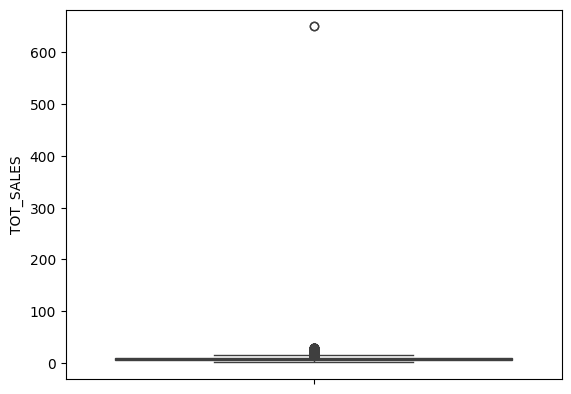

In [18]:
sns.boxplot(transaction_data.TOT_SALES)

# Removing Outliers

In [19]:
numericdata = transaction_data.select_dtypes(['float','int'])
numericdata.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1,1000,1,5,2,6.0
1,1,1307,348,66,3,6.3
2,1,1343,383,61,2,2.9
3,2,2373,974,69,5,15.0
4,2,2426,1038,108,3,13.8


In [20]:
X= numericdata[numericdata['TOT_SALES'] < 8.000]

In [21]:
X.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1,1000,1,5,2,6.0
1,1,1307,348,66,3,6.3
2,1,1343,383,61,2,2.9
5,4,4074,2982,57,1,5.1
6,4,4149,3333,16,1,5.7


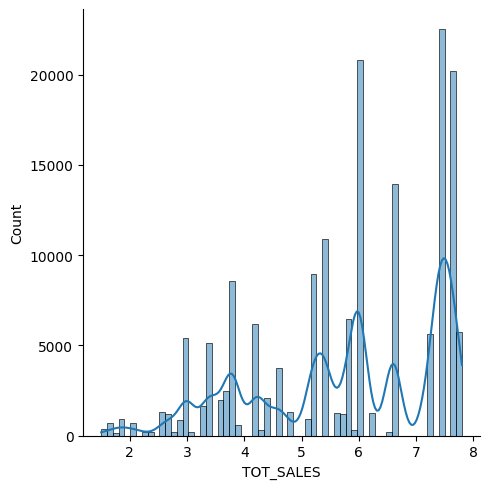

In [22]:
from statistics import kde


sns.displot(X.TOT_SALES, kde = True)

<Axes: ylabel='TOT_SALES'>

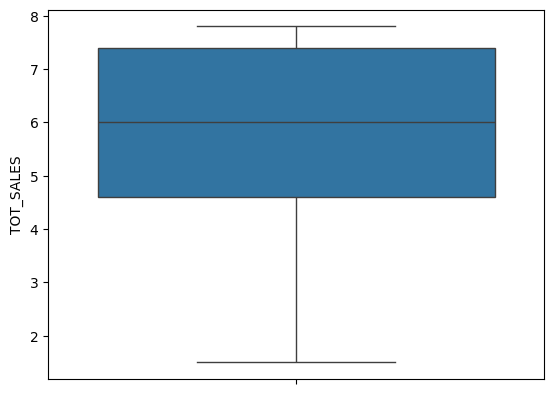

In [23]:
sns.boxplot(X.TOT_SALES)